In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('mobile_ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
purchased = df.groupby('Purchased').get_group(1)
notpurchased = df.groupby('Purchased').get_group(0)

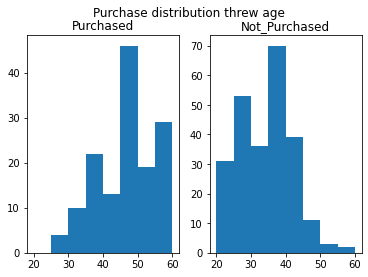

In [17]:
plt.subplot(1, 2, 1)
plt.hist(data=purchased, histtype='stepfilled',x='Age', bins=[20,25,30,35,40,45,50,55,60])
plt.title("Purchased")

#plot-2

plt.subplot(1, 2, 2)
plt.hist(data=notpurchased, histtype='stepfilled',x='Age', bins=[20,25,30,35,40,45,50,55,60])
plt.title("Not_Purchased")

plt.suptitle('Purchase distribution threw age')

plt.show()

In [53]:
malepurchased= purchased[purchased['Gender']=='Male'].Purchased.count()
femalepurchased = purchased[purchased['Gender']=='Female'].Purchased.count()
malenotpurchased= notpurchased[notpurchased['Gender']=='Male'].Purchased.count()
femalenotpurchased = notpurchased[notpurchased['Gender']=='Female'].Purchased.count()

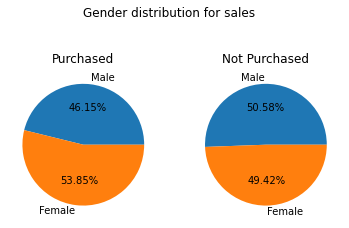

In [54]:
plt.subplot(1, 2, 1)
plt.pie(x=[malepurchased,femalepurchased], labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title("Purchased")

#plot-2

plt.subplot(1, 2, 2)
plt.pie(x=[malenotpurchased,femalenotpurchased], labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title("Not Purchased")

plt.suptitle('Gender distribution for sales')

plt.show()

In [56]:
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values
print(X.shape, '&', Y.shape)

(400, 2) & (400,)


In [61]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [62]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier_gini = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 0)
classifier.fit(X_Train,Y_Train)
classifier_gini.fit(X_Train,Y_Train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [64]:
Y_Pred = classifier.predict(X_Test)
Y_Pred_gini = classifier_gini.predict(X_Test)

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(Y_Test, Y_Pred)
cm_gini = confusion_matrix(Y_Test, Y_Pred_gini)
print('with entropy -->\n', cm, '\n with gini index --->\n', cm_gini , '\n Both predicted equally')

with entropy -->
 [[64  4]
 [ 4 28]] 
 with gini index --->
 [[64  4]
 [ 4 28]] 
 Both predicted equally


Text(33.0, 0.5, 'Truth')

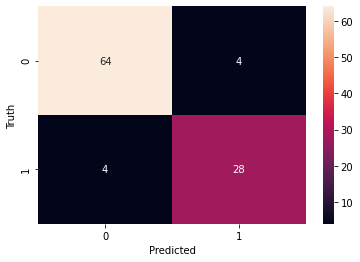

In [77]:
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


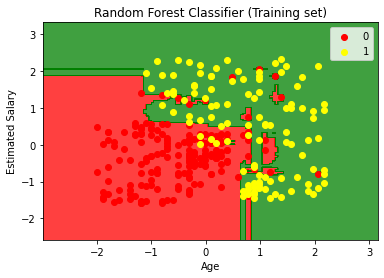

In [83]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


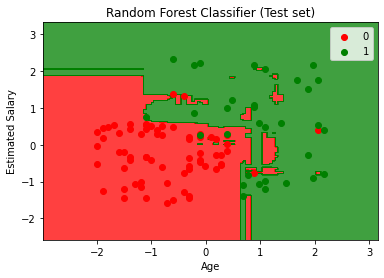

In [69]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()